In [8]:
#Method 1: Get word embeddings for all available words from Wikigigaworld.
import gensim.downloader as api
# Download dataset
glove_model50 = api.load('glove-wiki-gigaword-50')

[=================---------------------------------] 35.5% 23.4/66.0MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 66.0/66.0MB downloaded


In [9]:
import pandas as pd
from pandas import DataFrame
#words = pd.read_csv('DRitems.csv')
words = pd.read_csv('wordlist.csv')
#words.columns = ['Number', 'Word']
words

df = DataFrame(words, columns= ['Word'])
df_list = df.values.tolist()

from itertools import combinations
#convert pandas df to list
word_list = words['Word'].tolist()
#create every combination of items in the word list, the two is the number of comparisons
comb = list(combinations(word_list, 2))
network = []
for pair in comb: 
    temp = []
    temp.append(pair[0])
    temp.append(pair[1])
    try:
        temp.append(glove_model50.similarity(pair[0], pair[1]))
    except:
        temp.append(-999) # Term not found

    network.append(temp)
#create similarity matrix    
df_similarity = pd.DataFrame(network, columns=['origin','target','similarity'])
df_similarity.head()

#Filter out missing data
word_df = df_similarity.query("similarity != -999")
word_df_pos = word_df.query("similarity > .5")

In [15]:
comb

[('ant', 'bear'),
 ('ant', 'beaver'),
 ('ant', 'bee'),
 ('ant', 'bird'),
 ('ant', 'bug'),
 ('ant', 'chicken'),
 ('ant', 'deer'),
 ('ant', 'dolphin'),
 ('ant', 'donkey'),
 ('ant', 'eagle'),
 ('ant', 'fly'),
 ('ant', 'giraffe'),
 ('ant', 'gorilla'),
 ('ant', 'grasshopper'),
 ('ant', 'hippo'),
 ('ant', 'kangaroo'),
 ('ant', 'ladybug'),
 ('ant', 'leopard'),
 ('ant', 'lizard'),
 ('ant', 'llama'),
 ('ant', 'lobster'),
 ('ant', 'moose'),
 ('ant', 'mosquito'),
 ('ant', 'mouse'),
 ('ant', 'ostrich'),
 ('ant', 'panda'),
 ('ant', 'parrot'),
 ('ant', 'peacock'),
 ('ant', 'pelican'),
 ('ant', 'penguin'),
 ('ant', 'porcupine'),
 ('ant', 'rabbit'),
 ('ant', 'raccoon'),
 ('ant', 'rhinoceros'),
 ('ant', 'rooster'),
 ('ant', 'scorpion'),
 ('ant', 'seahorse'),
 ('ant', 'shark'),
 ('ant', 'sheep'),
 ('ant', 'shell'),
 ('ant', 'skunk'),
 ('ant', 'swan'),
 ('ant', 'turtle'),
 ('ant', 'unicorn'),
 ('ant', 'walrus'),
 ('ant', 'wolf'),
 ('ant', 'worm'),
 ('ant', 'antlers'),
 ('ant', 'arm'),
 ('ant', 'chest'),


In [12]:
# Plot similarity matrix for pasta
import networkx as nx
import matplotlib.pyplot as plt
options = {
    'node_color': 'red',
    'font_size': 25,
    'node_size': 50,
    #'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
    #'figsize' : (30, 30)
}

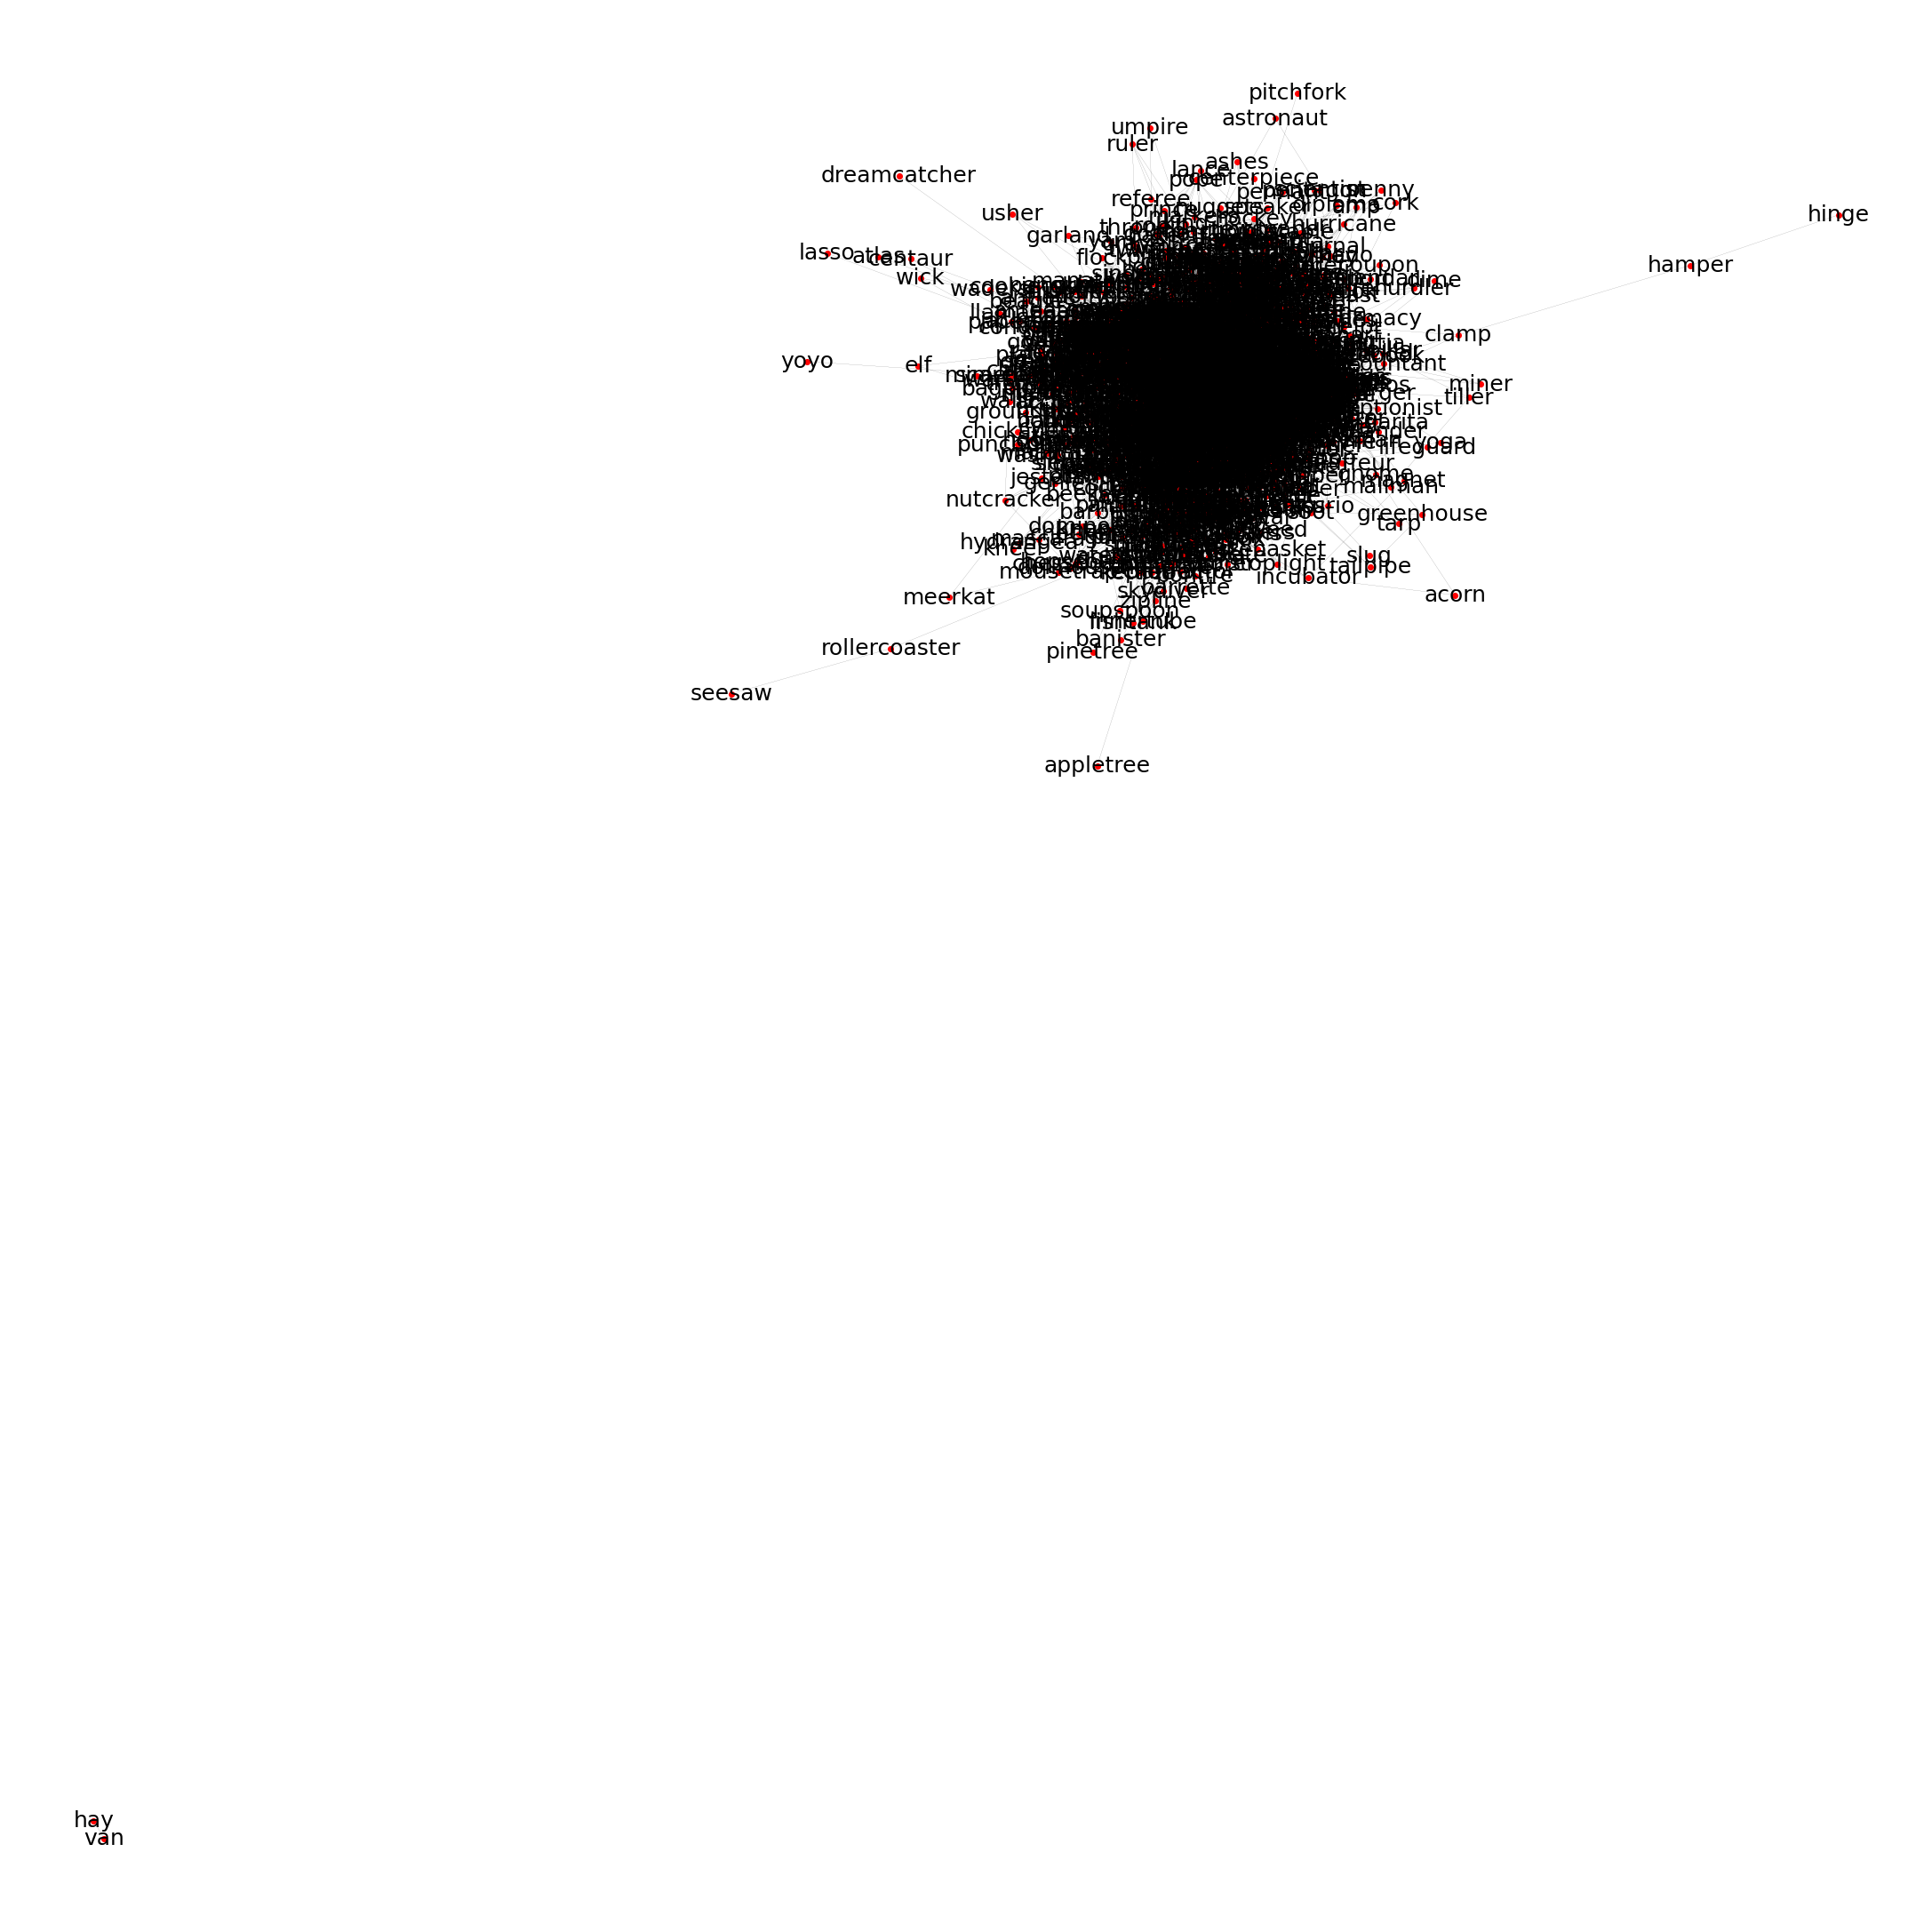

In [13]:
plt.figure(1, figsize=(30,30))
#graph = nx.draw_networkx(word_network, node_size=60, font_size=8)
word_network = nx.from_pandas_edgelist(word_df_pos, source = 'origin', target = 'target', edge_attr= 'similarity')
graph = nx.draw(word_network, with_labels=True, **options)
#plt.savefig('allwords_network.png')